## Application of regression analysis

The dataset alled Energy Efficiency dataset, containi nformation about energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.
eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
- X1	Relative Compactness
- X2	Surface Area
- X3	Wall Area
- X4	Roof Area
- X5	Overall Height
- X6	Orientation
- X7	Glazing Area
- X8	Glazing Area Distribution
- y1	Heating Load
- y2	Cooling Load

The data set can be downloade from this original source
https://archive.ics.uci.edu/dataset/242/energy+efficiency


### Question

Using regression, make two models to predict **Heating Load** and **Cooling Load** respectively, using the X independent variables.




## Solution

This is a multivariate, multivariable problem, meaning:

- Multivariate: It involves more than one measurement/output/target variable.
- Multivariable: It includes more than one feature/independent variable.

In this case, we will address each output variable separately, utilizing two distinct regression models (although there are more advanced statistical and machine learning techniques that can address both outputs simultaneously).

First, we import the appropriate libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data_3.4_ENB2012.csv")
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


This data has been thoroughly preprocessed and is in good condition. Nevertheless, it's important to remember that, in a typical scenario, we should conduct checks for null values, outliers, and other potential irregularities.

Once the data is in suitable condition, the next step involves dividing it into training and test sets, as described below:

In [2]:
# Separate independent variables (X) and dependent variables (y1 and y2)
X = data.drop(columns=['Y1', 'Y2'])
y1 = data['Y1']
y2 = data['Y2']

# Split the data into training and test sets for y1 and y2 separately
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=123)


We adopt an approach where we employ **separate linear regression models** for predicting y1 and y2. These models are constructed using the training data, and each is tailored to predict one of the two target variables, y1 and y2. By doing so, we can account for the unique relationships and factors influencing each of these variables, allowing for more precise and tailored predictions based on the provided training dataset

In [3]:
# Create and fit linear regression models for y1 and y2
model_y1 = LinearRegression()
model_y1.fit(X_train, y1_train)

model_y2 = LinearRegression()
model_y2.fit(X_train, y2_train)


LinearRegression()

We proceed with the prediction phase for the test dataset, using our trained models. 

It's worth noting that we perform this prediction step independently for each target variable. In other words, we use one model for predicting the first target (y1) and another model for predicting the second target (y2)

In [4]:
# Predict y1 and y2 values for the test data
y1_pred = model_y1.predict(X_test)
y2_pred = model_y2.predict(X_test)

We proceed to assess the performance of our models through a rigorous evaluation process. This involves the calculation of two key metrics: 
- the **Mean Squared Error (MSE)** and 
- the **R-squared (R2)** scores. 

These metrics indicate how well our regression models have performed in making predictions.

The MSE provides valuable insights into the accuracy of our predictions, measuring the average squared difference between our predicted values and the actual outcomes. 

On the other hand, the R-squared score offers an understanding of the model's ability to explain the variance in the data. 



In [5]:
# Calculate MSE and R2 for y1
mse_y1 = mean_squared_error(y1_test, y1_pred)
r2_y1 = r2_score(y1_test, y1_pred)

# Calculate MSE and R2 for y2
mse_y2 = mean_squared_error(y2_test, y2_pred)
r2_y2 = r2_score(y2_test, y2_pred)

print("MSE for y1:", mse_y1)
print("R2 for y1:", r2_y1)
print("MSE for y2:", mse_y2)
print("R2 for y2:", r2_y2)


MSE for y1: 8.308567877006707
R2 for y1: 0.90362074501222
MSE for y2: 8.705432665245946
R2 for y2: 0.8804387473834553


As a final step in our analysis, we visualize the results, creating plots that showcase the relationship between the actual and predicted values for both y1 and y2. 

These visualizations serve as a valuable tool for assessing our model's performance in a more intuitive and comprehensive manner. 


By comparing the actual outcomes with our model's predictions, we can readily identify any patterns, discrepancies, or areas where improvement may be needed. This visual assessment provides a holistic view of how well our models capture the underlying trends and behaviors within the data, ensuring that we have a well-rounded understanding of their overall performance.

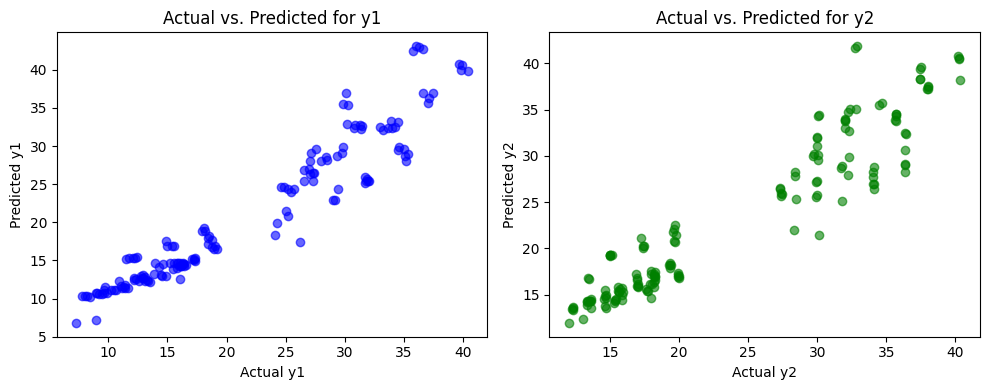

In [6]:
# Plot actual vs. predicted values for y1
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter( y1_pred, y1_test, color='blue', alpha=0.6)
plt.xlabel("Actual y1")
plt.ylabel("Predicted y1")
plt.title("Actual vs. Predicted for y1")

# Plot actual vs. predicted values for y2
plt.subplot(1, 2, 2)
plt.scatter( y2_pred,y2_test, color='green', alpha=0.6)
plt.xlabel("Actual y2")
plt.ylabel("Predicted y2")
plt.title("Actual vs. Predicted for y2")

plt.tight_layout()
plt.show()


We observe that the linear model manages to capture the overall trend quite effectively; however, there appears to be a degree of non-linearity towards the right end of the data range.

## Using non linear models.

"In our analysis, we've observed a subtle non-linear relationship between our predicted and actual values, prompting us to explore non-linear regression as a potential enhancement to our approach. To delve deeper into this, we'll focus on the target variable y1 (though we can replicate this analysis for y2 as well).

Our strategy involves feature expansion, specifically by incorporating the squares of our existing features. This process resembles what we previously did with a single variable but now extends to multiple variables. Rather than introducing numerous polynomial terms, we'll keep it straightforward and introduce just the squares. While we could technically include cross terms (products of variables with each other), we have eight features to start with, and introducing cross terms would result in 64 additional features. Such complexity might lead to overfitting, so for the sake of balance, we'll limit our expansion to include only the squares—adding eight additional features.

This approach allows us to create an augmented feature space. Within this expanded feature space, we can carry out linear regression analysis, providing us with the flexibility to capture potential non-linear dependencies between our original features and the target variable, y1. By taking this measured approach, we aim to strike a balance between accommodating non-linearity and maintaining a manageable and interpretable model.

We need to use the same split as before so we keep using X_train, X_test, y1_train, y1_test.

The code will look as follows (see also screen 3.3 for more details)

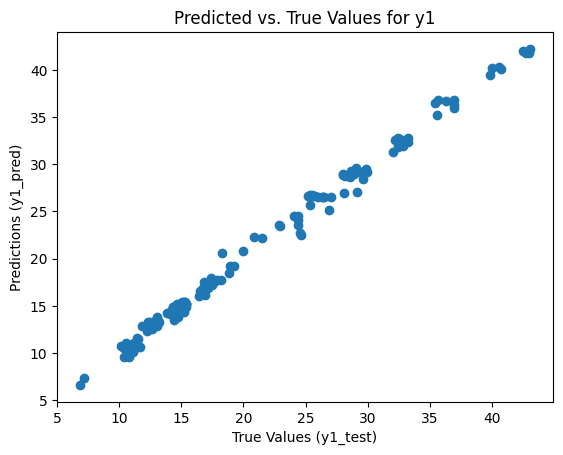

Mean Squared Error (MSE): 0.47837876189803347
R-squared (R2): 0.9944508139842845


In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Create PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the feature matrices to include squared terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train_poly, y1_train)

# Make predictions on the test data
y1_pred = model.predict(X_test_poly)

# Calculate metrics (MSE and R-squared) to assess model performance
mse_poly = mean_squared_error(y1_test, y1_pred)
r2_poly = r2_score(y1_test, y1_pred)

# Plot predicted vs. true values
plt.scatter(y1_test, y1_pred)
plt.xlabel("True Values (y1_test)")
plt.ylabel("Predictions (y1_pred)")
plt.title("Predicted vs. True Values for y1")
plt.show()

# Print the metrics
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R2): {r2_poly}")

We can see that for the first target variable, using a second degree, we have largely improved our model. Looking carefully at the $R^2$ results, we obtain:
- Linear model: $R^2 = 0.90$
- Polynomial model: $R^2 = 0.99$


And visually, based on the graph, we have effectively addressed the earlier non-linear behavior.

For the second target variable, we would obtain the following.

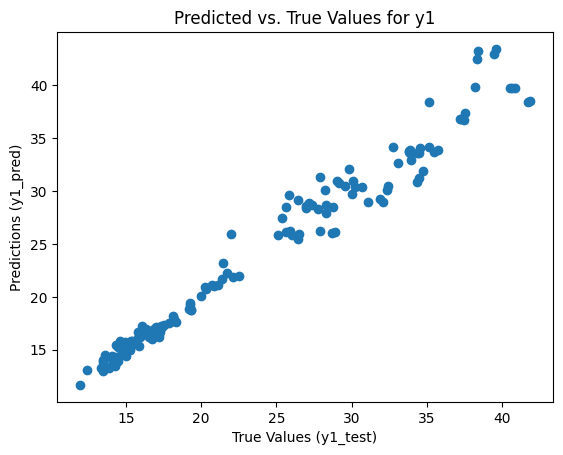

Mean Squared Error (MSE): 7.956885957822869
R-squared (R2): 0.972101906818384


In [8]:
# Create PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the feature matrices to include squared terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train_poly, y2_train)

# Make predictions on the test data
y2_pred = model.predict(X_test_poly)

# Calculate metrics (MSE and R-squared) to assess model performance
mse_poly_y2 = mean_squared_error(y1_test, y2_pred)
r2_poly_y2 = r2_score(y2_test, y2_pred)

# Plot predicted vs. true values
plt.scatter(y2_test, y2_pred)
plt.xlabel("True Values (y1_test)")
plt.ylabel("Predictions (y1_pred)")
plt.title("Predicted vs. True Values for y1")
plt.show()

# Print the metrics
print(f"Mean Squared Error (MSE): {mse_poly_y2}")
print(f"R-squared (R2): {r2_poly_y2}")

We can see that in the case of the second target variable, also using a second degree, we have improved our model. Looking carefully at the $R^2$ results, we obtain :
- Linear model: $R^2 = 0.90$
- Polynomial model: $R^2 = 0.97$
